In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset=pd.read_csv("insurance_pre.csv")

In [26]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [27]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [28]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [29]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [30]:
indep=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]
indep


,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [31]:
dep=dataset[['charges']]
dep

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [33]:
X_train

,age,bmi,children,sex_male,smoker_yes
482,18,31.35,0,0,0
338,50,32.30,1,1,1
356,46,43.89,3,1,0
869,25,24.30,3,0,0
182,22,19.95,3,1,0
...,...,...,...,...,...
763,27,26.03,0,1,0
835,42,35.97,2,1,0
1216,40,25.08,0,1,0
559,19,35.53,0,1,0


In [34]:
from sklearn.tree import DecisionTreeRegressor
#{'poisson', 'squared_error', 'absolute_error', 'friedman_mse'}

regressor=DecisionTreeRegressor( )
regressor=regressor.fit(X_train,y_train)

In [35]:
y_pred=regressor.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [37]:
r_score

0.6975528539693479

In [33]:
regressor.feature_importances_

array([0.35234371, 0.27754651, 0.04148774, 0.02227518, 0.30634686])

In [34]:
regressor.max_features_

5

In [37]:
regressor.tree_

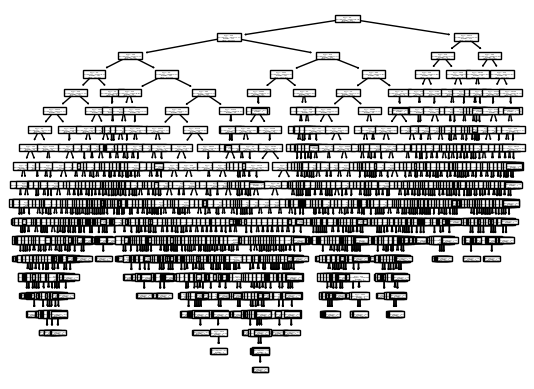

In [38]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()